# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
#import api_keys
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
query_url = f"{url}appid={api_key}&q="


#lists to hold response info
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=b9236bf68f6536419b89b84c003b355b&q='

In [28]:
response

{'coord': {'lon': 175.28, 'lat': -40.63},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 61,
  'feels_like': 62.65,
  'temp_min': 61,
  'temp_max': 61,
  'pressure': 1009,
  'humidity': 92},
 'visibility': 9470,
 'wind': {'speed': 1.99, 'deg': 307, 'gust': 5.99},
 'clouds': {'all': 100},
 'dt': 1604690426,
 'sys': {'type': 3,
  'id': 2035199,
  'country': 'NZ',
  'sunrise': 1604681991,
  'sunset': 1604732717},
 'timezone': 46800,
 'id': 2206371,
 'name': 'Levin',
 'cod': 200}

In [29]:
lat=[]
long=[]
country=[]
date=[]
temp=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind=[]
city_name=[]
#response= requests.get(query_url + city).json()
counter=0

#print(response["coord"])
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------")
for city in cities:
    response= requests.get(query_url + city+ "&units=imperial").json()
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(city)
        counter=counter+1
        print(f"Processing Record {counter}|{city}")
    except:
        print("City not found. Skipping...")
    time.sleep(1)
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

        



Beginning Data Retrieval
--------------------------
Processing Record 1|port alfred
Processing Record 2|new norfolk
Processing Record 3|richards bay
Processing Record 4|mar del plata
Processing Record 5|hermanus
Processing Record 6|coahuayana
Processing Record 7|cidreira
City not found. Skipping...
Processing Record 8|garachine
Processing Record 9|punta arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 10|guane
Processing Record 11|flinders
Processing Record 12|vostok
Processing Record 13|rikitea
Processing Record 14|jamestown
City not found. Skipping...
Processing Record 15|atuona
Processing Record 16|yellowknife
Processing Record 17|luderitz
City not found. Skipping...
Processing Record 18|barrow
Processing Record 19|busselton
Processing Record 20|vila do maio
Processing Record 21|ereymentau
Processing Record 22|ushuaia
City not found. Skipping...
Processing Record 23|lloydminster
Processing Record 24|kocevje
Processing Record 25|chuy
Processing Record 

Processing Record 242|high level
Processing Record 243|gillette
Processing Record 244|kitgum
Processing Record 245|barranca
Processing Record 246|langsa
Processing Record 247|pisco
Processing Record 248|cobija
Processing Record 249|male
Processing Record 250|araouane
Processing Record 251|abu kamal
Processing Record 252|fairbanks
Processing Record 253|banda aceh
Processing Record 254|asyut
Processing Record 255|ust-maya
Processing Record 256|lamar
Processing Record 257|nanortalik
Processing Record 258|turayf
Processing Record 259|meulaboh
Processing Record 260|labytnangi
Processing Record 261|panzhihua
Processing Record 262|lebanon
Processing Record 263|mount gambier
Processing Record 264|spilimbergo
Processing Record 265|kahului
Processing Record 266|pa sang
Processing Record 267|nouadhibou
Processing Record 268|lagoa
City not found. Skipping...
Processing Record 269|ndjole
Processing Record 270|saint-philippe
Processing Record 271|carnarvon
Processing Record 272|alto araguaia
Process

City not found. Skipping...
Processing Record 489|lipin bor
City not found. Skipping...
Processing Record 490|anadyr
Processing Record 491|altamira
Processing Record 492|conkal
City not found. Skipping...
Processing Record 493|veraval
City not found. Skipping...
Processing Record 494|anloga
Processing Record 495|uglegorskiy
Processing Record 496|akyab
Processing Record 497|san vicente
Processing Record 498|emerald
Processing Record 499|pimenta bueno
Processing Record 500|sao luis de montes belos
Processing Record 501|esna
Processing Record 502|praia
Processing Record 503|bestobe
Processing Record 504|kalmunai
Processing Record 505|kargil
Processing Record 506|lappeenranta
Processing Record 507|tessalit
Processing Record 508|sorland
Processing Record 509|ukwa
Processing Record 510|mikun
Processing Record 511|san patricio
Processing Record 512|warri
Processing Record 513|ulladulla
Processing Record 514|plouzane
Processing Record 515|rosarito
Processing Record 516|broadstairs
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#add country, date, max temp to for loop above
#unzip lat & long?

In [31]:
print(len(city_name), len(cloudiness), len(country), len(date), len(lat), len(long), len(temp_max), len(humidity), len(wind))

542 542 542 542 542 542 542 542 542


In [46]:
weather_df=pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Long": long, "Max Temp": temp_max, "Wind Speed": wind})
weather_df.to_csv("output", index=True)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,port alfred,0,ZA,1604802606,77,-33.59,26.89,64.18,8.70
1,new norfolk,0,AU,1604802906,40,-42.78,147.06,68.00,1.99
2,richards bay,0,ZA,1604802709,88,-28.78,32.04,72.84,4.00
3,mar del plata,90,AR,1604802908,100,-38.00,-57.56,62.01,5.82
4,hermanus,85,ZA,1604802909,79,-34.42,19.23,59.00,4.00
...,...,...,...,...,...,...,...,...,...
537,beberibe,40,BR,1604803553,78,-4.18,-38.13,80.60,12.75
538,dingzhou,0,CN,1604803554,20,38.51,115.00,53.60,8.95
539,carquefou,90,FR,1604803555,93,47.30,-1.49,57.20,6.93
540,menongue,75,AO,1604803556,55,-14.66,17.69,67.44,1.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

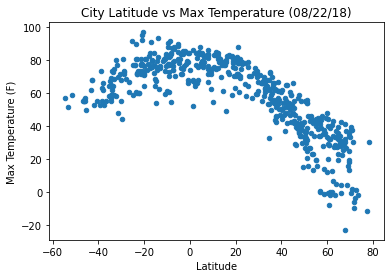

In [54]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", title= "City Latitude vs Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

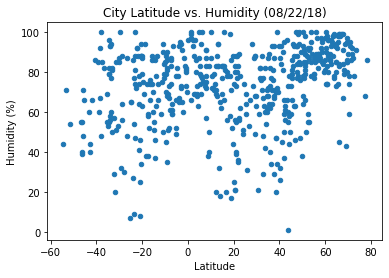

In [55]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", title= "City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

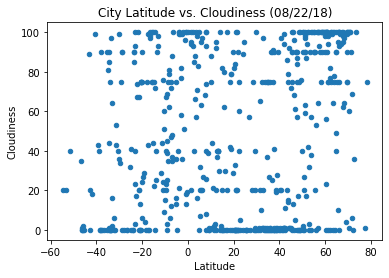

In [56]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title= "City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

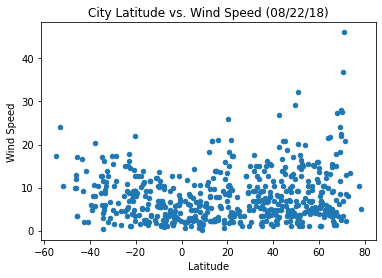

In [57]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title= "City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("lat_wind.png")
plt.show()

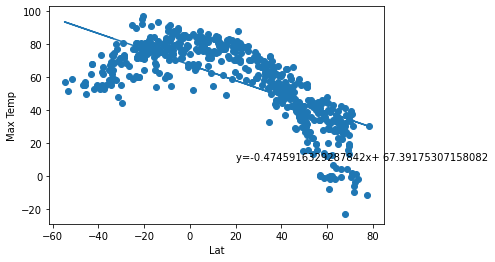

In [58]:
#Regression
def len_regression(x, y, x_label, y_label, a, b):
    (slope,intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regressvalues=slope*x+intercept
    regeq=f"y={slope}x+ {intercept}"
    plt.scatter(x,y)
    plt.plot(x,regressvalues)
    plt.annotate(regeq,(a,b))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
plt.savefig("lenregress.png")
len_regression(weather_df["Lat"], weather_df["Max Temp"], "Lat", "Max Temp", 20, 10 )
    
    